# Venda de remédios para saúde mental no Brasil nos últimos anos

Integrantes do grupo:
* Alexandre Zamora Zerbini Denigres
* Lucas Vinícius Santos De Lima
* Luiz Gustavo Mugnaini Anselmo
* Rayssa R. Oliveira De Faria
* Thiago Manata Michaelsen

<br>

O trabalho busca explorar, a partir da base de dados da ANVISA "*Venda de Medicamentos Controlados e Antimicrobianos - Medicamentos Manipulados*", disponível no [Kaggle](https://www.kaggle.com/datasets/tiagoacardoso/venda-medicamentos-controlados-anvisa?select=DB-Anvisa2.csv) \(extraído do [Portal de Dados Abertos do Governo Federal](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-manipulados)), a evolução do consumo de remédios para tratamento de transtornos mentais no Brasil nos últimos anos, investigando o seu comportamento ao longo do período de pandemia da COVID-19.

## Importação e preparação da base de dados

In [ ]:
# Importação das bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

### Obtenção dos datasets pela API do Kaggle

In [ ]:
# Importação das credenciais do Kaggle (arquivo "kaggle.json"):

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"limalucks","key":"2a82a8991e5451ca20f0bb6b87b1052d"}'}

In [ ]:
# Instalação da biblioteca do Kaggle

!pip install -q kaggle

In [ ]:
# Configurações para utilização do arquivo "kaggle.json"

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download do zip contendo as bases de dados:

!kaggle datasets download -d tiagoacardoso/venda-medicamentos-controlados-anvisa

 98% 394M/401M [00:04<00:00, 71.8MB/s]
100% 401M/401M [00:04<00:00, 88.1MB/s]


In [ ]:
# Extração do zip:

!unzip venda-medicamentos-controlados-anvisa.zip

Archive:  venda-medicamentos-controlados-anvisa.zip
  inflating: Anvisa_documentation_PTBR.pdf  
  inflating: DB-ANVISA-BY-YEAR/DB-Anvisa-2014.csv  
  inflating: DB-ANVISA-BY-YEAR/DB-Anvisa-2015.csv  
  inflating: DB-ANVISA-BY-YEAR/DB-Anvisa-2016.csv  
  inflating: DB-ANVISA-BY-YEAR/DB-Anvisa-2017.csv  
  inflating: DB-ANVISA-BY-YEAR/DB-Anvisa-2018.csv  
  inflating: DB-ANVISA-BY-YEAR/DB-Anvisa-2019.csv  
  inflating: DB-ANVISA-BY-YEAR/DB-Anvisa-2020.csv  
  inflating: DB-ANVISA-BY-YEAR/DB-Anvisa-2021.csv  
  inflating: DB-Anvisa2.csv          


### Leitura e tratamento da base de dados

O conjunto de dados de todos os anos disponíveis (2014 a 2021) é muito pesado, assim, para que consigamos operar a base dentro da capacidade de memória RAM disponível, faz-se necessário um recorte para lidar com um volume de dados menor.

A seguir listamos os princípios ativos principais relativos ao **tratamento de transtornos mentais** (foco da análise), de modo que sejam usados posteriormente para filtrar as bases e concatenarmos em um único DataFrame.

In [ ]:
# Lista de princípios ativos relacionados ao tratamento de transtornos mentais:
principiosTM = [
    'SERTRALINA',
    'FLUOXETINA',
    'ESCITALOPRAM',
    'PAROXETINA',
    'VENLAFAXINA',
    'PAROXETINA',
    'CLONAZEPAM',
    'CLOMIPRAMINA',
    'VENLAFAXINA',
    'ZOLPIDEM',
    "CLORIDRATO DE AMITRIPTILINA",
    "OXALATO DE ESCITALOPRAM",
    "CLORIDRATO DE FLUOXETINA",
    "CLORIDRATO DE IMIPRAMINA",
    "CLORIDRATO DE NORTRIPTILINA",
    "PREGABALINA",
    "HEMIFUMARATO DE QUETIAPINA",
    "RISPERIDONA",
    "CLORIDRATO DE SERTRALINA",
    "CLORIDRATO DE PAROXETINA",
    "ALPRAZOLAM",
    "LAMOTRIGINA",
    "GABAPENTINA",
    "VENLAFAXINA",
    "MEMANTINA",
    "RIVOTRIL",
    "LEXAPRO",
    "PROZAC",
    "ZOLOFT",
    "XANAX"
]

A seguir é feita a leitura das bases de dados de cada ano, cujos *DataFrames* são inseridos dentro de um dicionário após o filtragem de apenas os princípios ativos listados acima.

In [ ]:
dfs_anos = dict()
for ano in range(2016, 2022): # recorte de anos para análise
  df_ano = pd.read_csv("./DB-ANVISA-BY-YEAR/DB-Anvisa-" + str(ano) + ".csv", low_memory=False)
  dfs_anos[str(ano)] = df_ano[df_ano["PRINCIPIO_ATIVO"].isin(principiosTM)]

In [ ]:
# Concatenação das linhas do dicionário criado acima em um único DataFrame:
df = pd.concat(dfs_anos.values(), ignore_index=True)

#### Visão geral dos dados

In [ ]:
df

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,DCB,PRINCIPIO_ATIVO,QTD_ATIVO_POR_UNID_FARMACOTEC,UNIDADE_MEDIDA_PRINCIPIO_ATIVO,QTD_UNIDADE_FARMACOTECNICA,TIPO_UNIDADE_FARMACOTECNICA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,2016,1,AC,CRUZEIRO DO SUL,597,ALPRAZOLAM,"0,00025",GRAMA,630,CÁPSULA,CRM,AC,2,NaN,NaN,NaN,NaN
1,2016,1,AC,CRUZEIRO DO SUL,597,ALPRAZOLAM,"0,002",GRAMA,420,CÁPSULA,CRM,AC,2,NaN,NaN,NaN,NaN
2,2016,1,AC,CRUZEIRO DO SUL,712,CLORIDRATO DE AMITRIPTILINA,"0,02",GRAMA,210,CÁPSULA,CRM,AC,1,NaN,NaN,NaN,NaN
3,2016,1,AC,CRUZEIRO DO SUL,712,CLORIDRATO DE AMITRIPTILINA,"0,0125",GRAMA,2310,CÁPSULA,CRM,AC,1,NaN,NaN,NaN,NaN
4,2016,1,AC,CRUZEIRO DO SUL,712,CLORIDRATO DE AMITRIPTILINA,"0,025",GRAMA,840,CÁPSULA,CRM,AC,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556563,2021,11,TO,PORTO NACIONAL,7539,HEMIFUMARATO DE QUETIAPINA,"0,035",GRAMA,840,CÁPSULA,CRM,TO,1,NaN,NaN,NaN,NaN
7556564,2021,11,TO,PORTO NACIONAL,7748,RISPERIDONA,"0,0005",GRAMA,420,CÁPSULA,CRM,TO,1,NaN,NaN,NaN,NaN
7556565,2021,11,TO,PORTO NACIONAL,7748,RISPERIDONA,"0,001",GRAMA,420,CÁPSULA,CRM,TO,1,NaN,NaN,NaN,NaN
7556566,2021,11,TO,PORTO NACIONAL,7964,CLORIDRATO DE SERTRALINA,"0,056",GRAMA,420,CÁPSULA,CRM,TO,1,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7556568 entries, 0 to 7556567
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   ANO_VENDA                       int64  
 1   MES_VENDA                       int64  
 2   UF_VENDA                        object 
 3   MUNICIPIO_VENDA                 object 
 4   DCB                             int64  
 5   PRINCIPIO_ATIVO                 object 
 6   QTD_ATIVO_POR_UNID_FARMACOTEC   object 
 7   UNIDADE_MEDIDA_PRINCIPIO_ATIVO  object 
 8   QTD_UNIDADE_FARMACOTECNICA      object 
 9   TIPO_UNIDADE_FARMACOTECNICA     object 
 10  CONSELHO_PRESCRITOR             object 
 11  UF_CONSELHO_PRESCRITOR          object 
 12  TIPO_RECEITUARIO                int64  
 13  CID10                           object 
 14  SEXO                            float64
 15  IDADE                           float64
 16  UNIDADE_IDADE                   float64
dtypes: float64(3), int64(4), ob

#### Manipulação dos dados

In [ ]:
df['QTD_ATIVO_POR_UNID_FARMACOTEC']

0          0,00025
1            0,002
2             0,02
3           0,0125
4            0,025
            ...   
7556563      0,035
7556564     0,0005
7556565      0,001
7556566      0,056
7556567     0,0224
Name: QTD_ATIVO_POR_UNID_FARMACOTEC, Length: 7556568, dtype: object

In [ ]:
# Substituir vírgula por ponto nos valores da coluna "QTD_ATIVO_POR_UNID_FARMACOTEC":

df['QTD_ATIVO_POR_UNID_FARMACOTEC'].astype('|S') # conversão de objeto para string
df['QTD_ATIVO_POR_UNID_FARMACOTEC'].replace(',', '.', regex=True, inplace=True) # substituição de ',' por '.'

df['QTD_ATIVO_POR_UNID_FARMACOTEC'] # verificação do resultado

0          0.00025
1            0.002
2             0.02
3           0.0125
4            0.025
            ...   
7556563      0.035
7556564     0.0005
7556565      0.001
7556566      0.056
7556567     0.0224
Name: QTD_ATIVO_POR_UNID_FARMACOTEC, Length: 7556568, dtype: object

In [ ]:
# Conversão dos campos de quantidade para tipo numérico:

df['QTD_ATIVO_POR_UNID_FARMACOTEC'] = pd.to_numeric(df['QTD_ATIVO_POR_UNID_FARMACOTEC'], errors='coerce')
df['QTD_UNIDADE_FARMACOTECNICA'] = pd.to_numeric(df['QTD_UNIDADE_FARMACOTECNICA'], errors='coerce')

df[['QTD_ATIVO_POR_UNID_FARMACOTEC', 'QTD_UNIDADE_FARMACOTECNICA']] # verificação do resultado

,QTD_ATIVO_POR_UNID_FARMACOTEC,QTD_UNIDADE_FARMACOTECNICA
0,0.00025,630.0
1,0.00200,420.0
2,0.02000,210.0
3,0.01250,2310.0
4,0.02500,840.0
...,...,...
7556563,0.03500,840.0
7556564,0.00050,420.0
7556565,0.00100,420.0
7556566,0.05600,420.0


In [ ]:
df[['QTD_ATIVO_POR_UNID_FARMACOTEC', 'QTD_ATIVO_POR_UNID_FARMACOTEC']].dtypes # verificação dos dtypes das colunas convertidas

QTD_ATIVO_POR_UNID_FARMACOTEC    float64
QTD_ATIVO_POR_UNID_FARMACOTEC    float64
dtype: object

A seguir há a criação da coluna de data da venda (dia 1º de cada mês apenas como convenção) para que haja uma referência cronológica dos dados:

In [ ]:
# Criação de coluna de data da venda (tipo datetime):
df['DATA_VENDA'] = pd.to_datetime({'day':1, 'month':df['MES_VENDA'],'year':df['ANO_VENDA']})

df[['ANO_VENDA', 'MES_VENDA', 'DATA_VENDA']] # verificação do resultado

,ANO_VENDA,MES_VENDA,DATA_VENDA
0,2016,1,2016-01-01
1,2016,1,2016-01-01
2,2016,1,2016-01-01
3,2016,1,2016-01-01
4,2016,1,2016-01-01
...,...,...,...
7556563,2021,11,2021-11-01
7556564,2021,11,2021-11-01
7556565,2021,11,2021-11-01
7556566,2021,11,2021-11-01


In [ ]:
df[['DATA_VENDA']].dtypes # verificação do dtype da coluna nova

DATA_VENDA    datetime64[ns]
dtype: object

Para que possamos categorizar os tipos de princípios ativos (já dentro do contexto daqueles que tratam de saúde mental), iremos criar uma coluna que classifica cada princípio ativo em um determinado grupo (discriminados abaixo).

In [ ]:
# Lista de Ansiolíticos
ansioliticos = [
    'CLONAZEPAM',
    'ALPRAZOLAM',
    'RIVOTRIL',
    'XANAX',
    'PREGABALINA'
]

# Lista de Antidepressivos
antidepressivos = [
    'SERTRALINA',
    'CLORIDRATO DE SERTRALINA',
    'FLUOXETINA',
    'ESCITALOPRAM',
    'PAROXETINA',
    'VENLAFAXINA',
    'CLOMIPRAMINA',
    'CLORIDRATO DE AMITRIPTILINA',
    'CLORIDRATO DE IMIPRAMINA',
    'CLORIDRATO DE NORTRIPTILINA',
    'OXALATO DE ESCITALOPRAM',
    'CLORIDRATO DE FLUOXETINA',
    'CLORIDRATO DE PAROXETINA',
    'LAMOTRIGINA',
    'GABAPENTINA',
    'MEMANTINA'
]

# Lista de Antipsicóticos
antipsicoticos = [
    'HEMIFUMARATO DE QUETIAPINA',
    'RISPERIDONA',
    'RISPERIDONA',
    'HEMIFUMARATO DE QUETIAPINA'
]

# Lista de Hipnóticos/Sedativos
hipnoticos_sedativos = [
    'ZOLPIDEM'
]

In [ ]:
# Criação da coluna de tipos de princípios ativos de acordo com as listas acima:

df['TIPO_PRINCIPIO'] = np.where(
    df['PRINCIPIO_ATIVO'].isin(ansioliticos), 'ANSIOLITICO', np.where(
    df['PRINCIPIO_ATIVO'].isin(antidepressivos), 'ANTIDEPRESSIVO', np.where(
    df['PRINCIPIO_ATIVO'].isin(antipsicoticos), 'ANTIPSICOTICO', np.where(
    df['PRINCIPIO_ATIVO'].isin(hipnoticos_sedativos), 'HIPNOTICOS_SEDATIVOS', 'OUTROS')))
)

df[['PRINCIPIO_ATIVO', 'TIPO_PRINCIPIO']] # verificação do resultado

,PRINCIPIO_ATIVO,TIPO_PRINCIPIO
0,ALPRAZOLAM,ANSIOLITICO
1,ALPRAZOLAM,ANSIOLITICO
2,CLORIDRATO DE AMITRIPTILINA,ANTIDEPRESSIVO
3,CLORIDRATO DE AMITRIPTILINA,ANTIDEPRESSIVO
4,CLORIDRATO DE AMITRIPTILINA,ANTIDEPRESSIVO
...,...,...
7556563,HEMIFUMARATO DE QUETIAPINA,ANTIPSICOTICO
7556564,RISPERIDONA,ANTIPSICOTICO
7556565,RISPERIDONA,ANTIPSICOTICO
7556566,CLORIDRATO DE SERTRALINA,ANTIDEPRESSIVO


## Exploração dos dados

<Axes: xlabel='DATA_VENDA'>

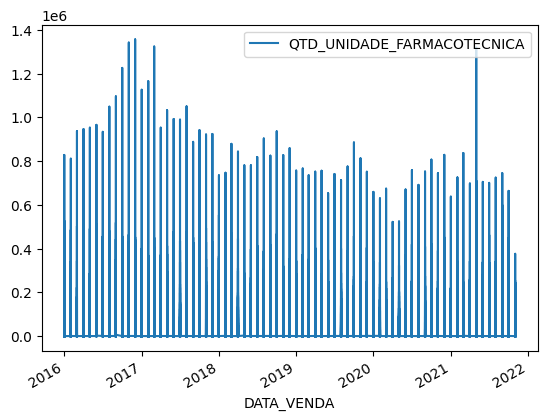

In [ ]:
df.plot(x='DATA_VENDA', y='QTD_UNIDADE_FARMACOTECNICA')

<Axes: xlabel='ANO_VENDA'>

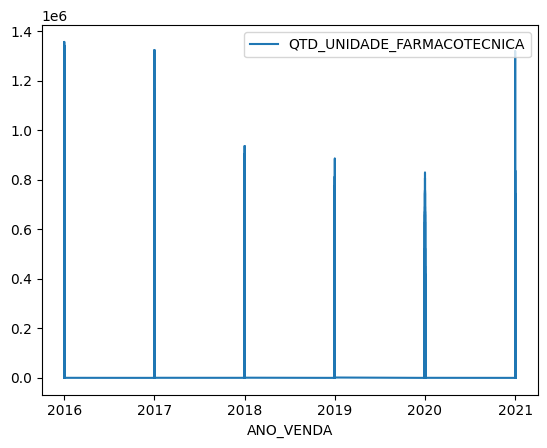

In [ ]:
df.plot(x='ANO_VENDA', y='QTD_UNIDADE_FARMACOTECNICA')

TIPO_PRINCIPIO
ANSIOLITICO             Axes(0.125,0.11;0.775x0.77)
ANTIDEPRESSIVO          Axes(0.125,0.11;0.775x0.77)
ANTIPSICOTICO           Axes(0.125,0.11;0.775x0.77)
HIPNOTICOS_SEDATIVOS    Axes(0.125,0.11;0.775x0.77)
Name: QTD_UNIDADE_FARMACOTECNICA, dtype: object

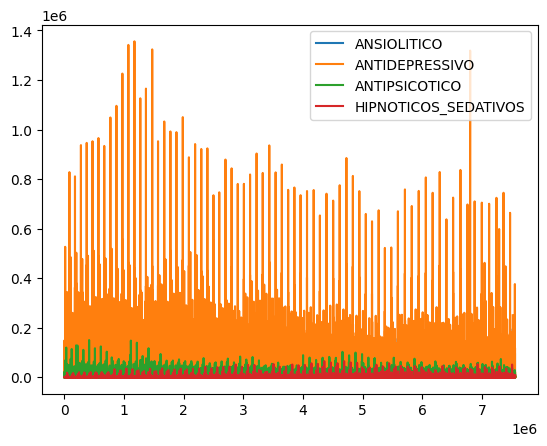

In [ ]:
df.groupby('TIPO_PRINCIPIO')['QTD_UNIDADE_FARMACOTECNICA'].plot(legend=True, kind='line')

TIPO_PRINCIPIO
ANSIOLITICO             Axes(0.125,0.2;0.775x0.68)
ANTIDEPRESSIVO          Axes(0.125,0.2;0.775x0.68)
ANTIPSICOTICO           Axes(0.125,0.2;0.775x0.68)
HIPNOTICOS_SEDATIVOS    Axes(0.125,0.2;0.775x0.68)
dtype: object

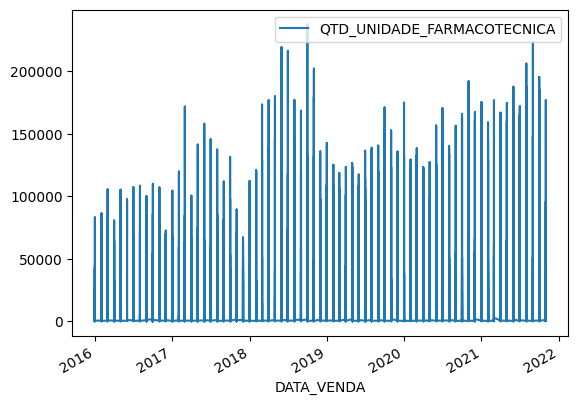

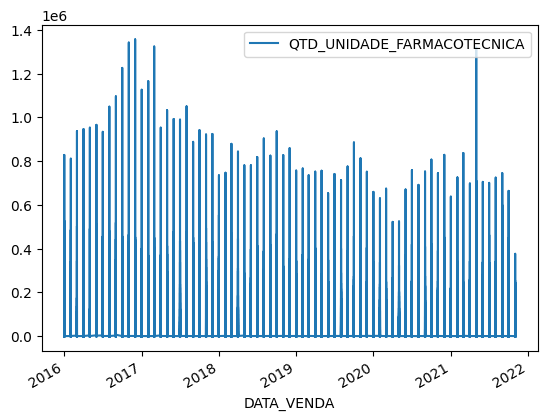

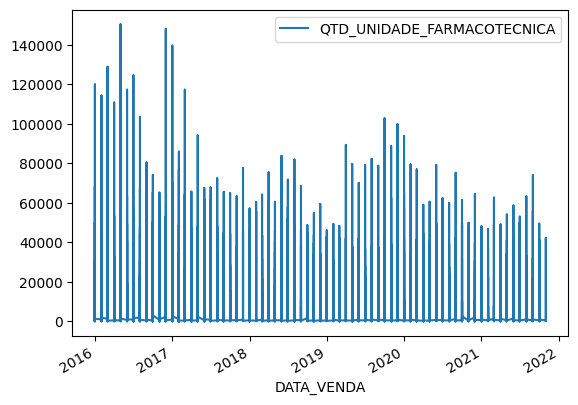

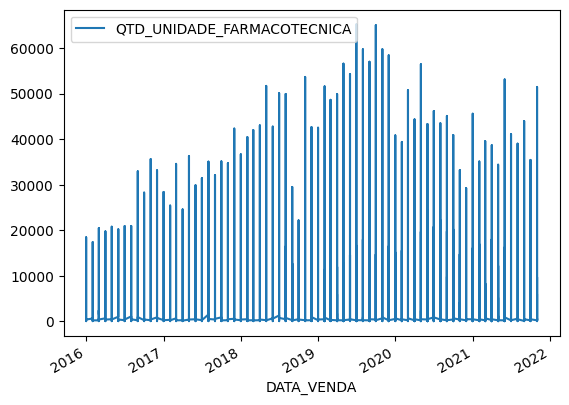

In [ ]:
df.groupby('TIPO_PRINCIPIO').plot(x='DATA_VENDA', y='QTD_UNIDADE_FARMACOTECNICA', legend=True, kind='line')

<ipython-input-42-81330cc0da50>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pd.groupby('TIPO_PRINCIPIO')['ANO_VENDA', 'QTD_UNIDADE_FARMACOTECNICA'].plot(x = 'ANO_VENDA', legend=True)


TIPO_PRINCIPIO
ANSIOLITICO             Axes(0.125,0.11;0.775x0.77)
ANTIDEPRESSIVO          Axes(0.125,0.11;0.775x0.77)
ANTIPSICOTICO           Axes(0.125,0.11;0.775x0.77)
HIPNOTICOS_SEDATIVOS    Axes(0.125,0.11;0.775x0.77)
dtype: object

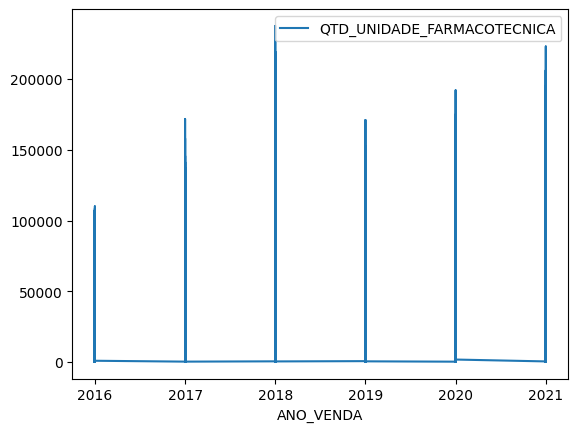

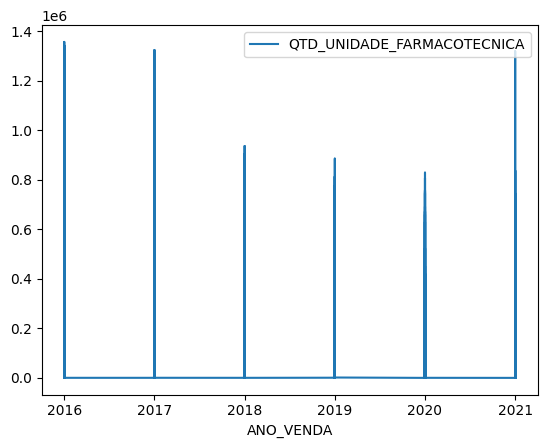

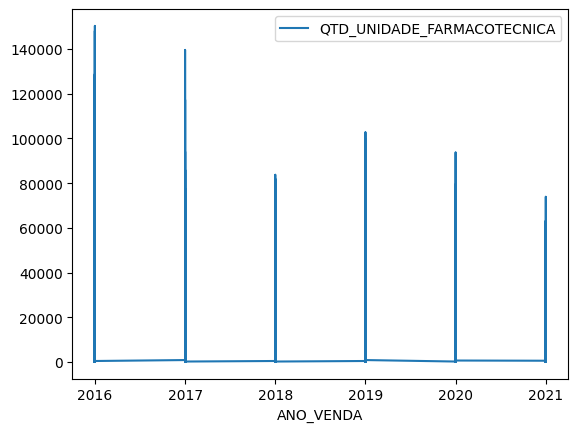

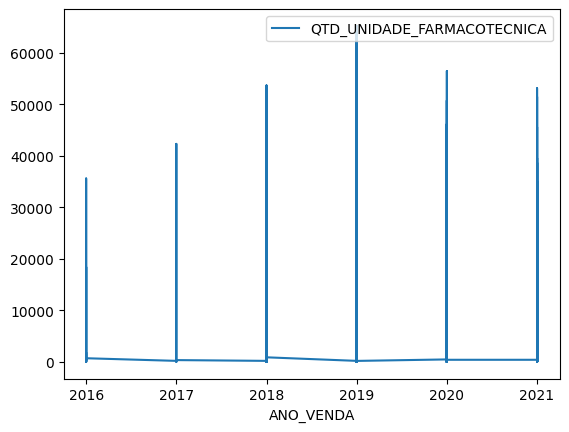

In [ ]:
df.groupby('TIPO_PRINCIPIO')['ANO_VENDA', 'QTD_UNIDADE_FARMACOTECNICA'].plot(x = 'ANO_VENDA', legend=True)

In [ ]:
# Agrupando os dados por ano de venda e tipo de princípio ativo, somando a quantidade vendida:
agrupado_AnoTipo = df.groupby(['ANO_VENDA', 'TIPO_PRINCIPIO'])['QTD_UNIDADE_FARMACOTECNICA'].sum().reset_index()

# Calculando a quantidade total vendida em cada ano:
agrupado_AnoTipo_totalAno = agrupado_AnoTipo.groupby(['ANO_VENDA'])['QTD_UNIDADE_FARMACOTECNICA'].transform('sum')

# Calculando o percentual de vendas do tipo em relação ao total no ano correspondente:
agrupado_AnoTipo['PERCENTUAL'] = agrupado_AnoTipo['QTD_UNIDADE_FARMACOTECNICA'] / agrupado_AnoTipo_totalAno * 100

# Criando um novo DataFrame com as colunas desejadas:
df_tipo_anual = agrupado_AnoTipo[['ANO_VENDA', 'TIPO_PRINCIPIO', 'PERCENTUAL']]

# Renomeando as colunas para os nomes desejados:
df_tipo_anual.columns = ['Ano', 'Tipo Princípio Ativo', 'Percentual Vendido']

df_tipo_anual # verificação do resultado

,Ano,Tipo Princípio Ativo,Percentual Vendido
0,2016,ANSIOLITICO,10.822624
1,2016,ANTIDEPRESSIVO,81.829917
2,2016,ANTIPSICOTICO,7.134627
3,2016,HIPNOTICOS_SEDATIVOS,0.212832
4,2017,ANSIOLITICO,11.632220
5,2017,ANTIDEPRESSIVO,80.632817
6,2017,ANTIPSICOTICO,7.434260
7,2017,HIPNOTICOS_SEDATIVOS,0.300703
8,2018,ANSIOLITICO,13.289074
9,2018,ANTIDEPRESSIVO,78.604151


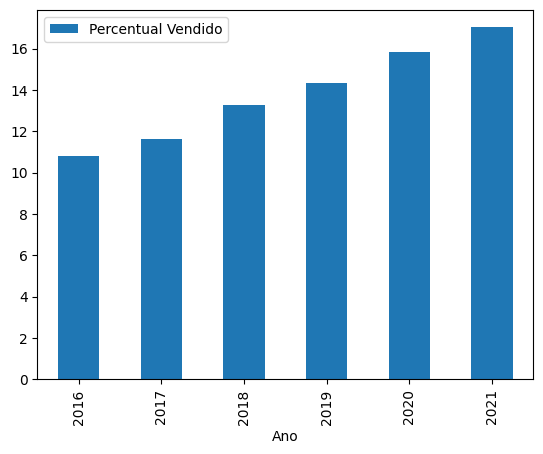

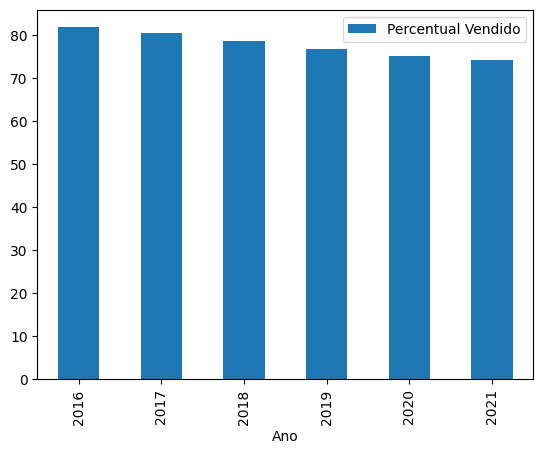

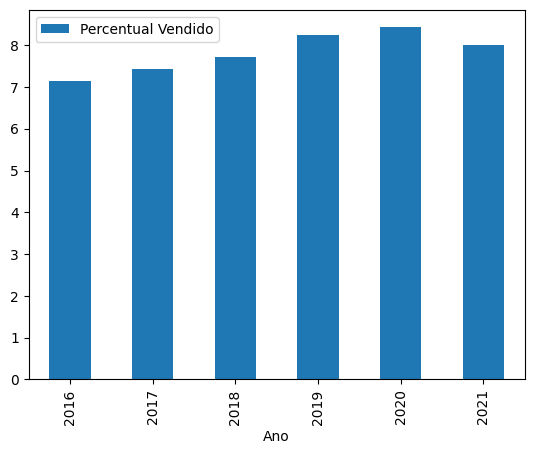

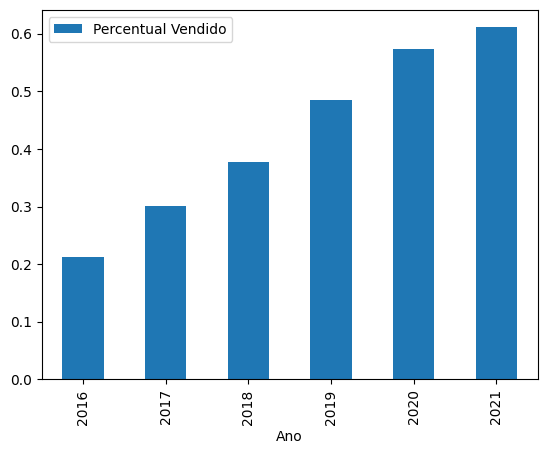

In [ ]:
df_tipo_anual.groupby('Tipo Princípio Ativo')[['Ano','Percentual Vendido']].plot.bar(x='Ano', y='Percentual Vendido', stacked=True)
plt.show()

<Axes: xlabel='Ano'>

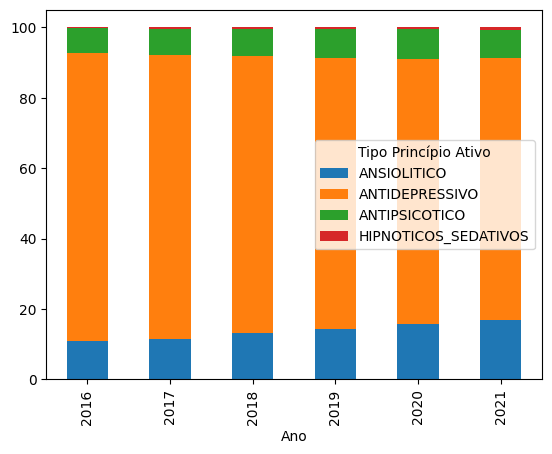

In [ ]:
group = df_tipo_anual.groupby(['Ano', 'Tipo Princípio Ativo'])['Percentual Vendido'].sum().unstack('Tipo Princípio Ativo')
group.plot(kind='bar', stacked=True)

Obtendo o percentual de cada príncipio ativo vendido por estado e mês correspondentes


In [ ]:
# Agrupando os dados por estado, ano e tipo de princípio ativo, somando a quantidade vendida
grouped = df.groupby(['UF_VENDA', 'ANO_VENDA', 'TIPO_PRINCIPIO'])['QTD_UNIDADE_FARMACOTECNICA'].sum().reset_index()

# Calculando a quantidade total vendida de cada princípio ativo em cada estado
total_per_state = grouped.groupby(['UF_VENDA', 'ANO_VENDA'])['QTD_UNIDADE_FARMACOTECNICA'].transform('sum')

# Calculando o percentual de vendas do princípio ativo em relação ao total no estado e mês correspondentes
grouped['PERCENTUAL'] = grouped['QTD_UNIDADE_FARMACOTECNICA'] / total_per_state * 100

# Criando um novo DataFrame com as colunas desejadas
df_UF = grouped[['UF_VENDA', 'ANO_VENDA', 'TIPO_PRINCIPIO', 'PERCENTUAL']]

# Renomeando as colunas para os nomes desejados
df_UF.columns = ['Estado', 'Ano', 'Tipo Princípio Ativo', 'Percentual Vendido']

df_UF


,Estado,Ano,Tipo Princípio Ativo,Percentual Vendido
0,AC,2016,ANSIOLITICO,5.499364
1,AC,2016,ANTIDEPRESSIVO,86.704132
2,AC,2016,ANTIPSICOTICO,7.796503
3,AC,2017,ANSIOLITICO,7.162314
4,AC,2017,ANTIDEPRESSIVO,87.725557
...,...,...,...,...
617,TO,2020,HIPNOTICOS_SEDATIVOS,0.139125
618,TO,2021,ANSIOLITICO,12.166123
619,TO,2021,ANTIDEPRESSIVO,68.790305
620,TO,2021,ANTIPSICOTICO,18.982119


# Testes

In [ ]:
# Exportação do DataFrame fitrado e concatenado para csv

# df.to_csv('df.csv', index=False)
# files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_mensal['Princípio Ativo'].unique()

array(['CLONAZEPAM', 'CLORIDRATO DE AMITRIPTILINA',
       'CLORIDRATO DE FLUOXETINA', 'CLORIDRATO DE IMIPRAMINA',
       'CLORIDRATO DE NORTRIPTILINA', 'CLORIDRATO DE PAROXETINA',
       'CLORIDRATO DE SERTRALINA', 'GABAPENTINA',
       'HEMIFUMARATO DE QUETIAPINA', 'PREGABALINA', 'RISPERIDONA',
       'ALPRAZOLAM', 'OXALATO DE ESCITALOPRAM', 'LAMOTRIGINA',
       'FLUOXETINA', 'SERTRALINA', 'VENLAFAXINA', 'ESCITALOPRAM',
       'PAROXETINA', 'ZOLPIDEM', 'CLOMIPRAMINA', 'MEMANTINA'],
      dtype=object)

<Axes: xlabel='Data'>

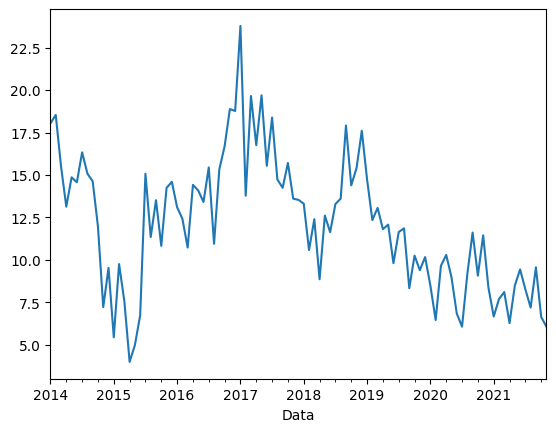

In [ ]:
filtro1 = (df_mensal['Princípio Ativo'] == 'CLORIDRATO DE FLUOXETINA')
filtro2 = (df_mensal['Estado'] == 'AC')

df_mensal.loc[filtro1 & filtro2, 'Percentual Vendido'].plot()

Princípio Ativo
ALPRAZOLAM                     Axes(0.125,0.2;0.775x0.68)
CLOMIPRAMINA                   Axes(0.125,0.2;0.775x0.68)
CLONAZEPAM                     Axes(0.125,0.2;0.775x0.68)
CLORIDRATO DE AMITRIPTILINA    Axes(0.125,0.2;0.775x0.68)
CLORIDRATO DE FLUOXETINA       Axes(0.125,0.2;0.775x0.68)
CLORIDRATO DE IMIPRAMINA       Axes(0.125,0.2;0.775x0.68)
CLORIDRATO DE NORTRIPTILINA    Axes(0.125,0.2;0.775x0.68)
CLORIDRATO DE PAROXETINA       Axes(0.125,0.2;0.775x0.68)
CLORIDRATO DE SERTRALINA       Axes(0.125,0.2;0.775x0.68)
ESCITALOPRAM                   Axes(0.125,0.2;0.775x0.68)
FLUOXETINA                     Axes(0.125,0.2;0.775x0.68)
GABAPENTINA                    Axes(0.125,0.2;0.775x0.68)
HEMIFUMARATO DE QUETIAPINA     Axes(0.125,0.2;0.775x0.68)
LAMOTRIGINA                    Axes(0.125,0.2;0.775x0.68)
MEMANTINA                      Axes(0.125,0.2;0.775x0.68)
OXALATO DE ESCITALOPRAM        Axes(0.125,0.2;0.775x0.68)
PAROXETINA                     Axes(0.125,0.2;0.775x0.68

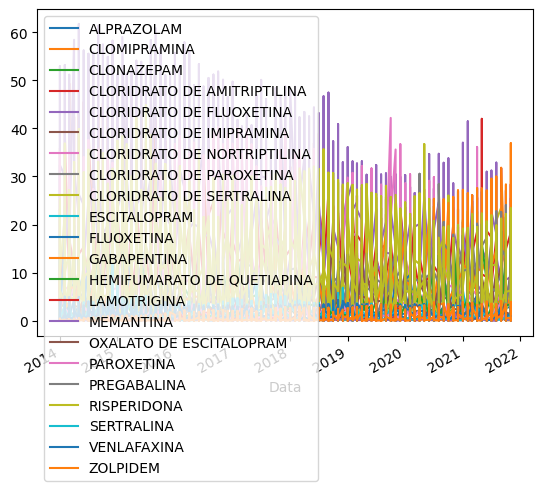

In [ ]:
# Alteração do index para Data. O gráfico plotado ainda gera confusâo devido à quantidade de princípios ativos
# Recomenda-se agrupar os dados por Princípio Ativo, retirando a divisão por Estado, para verificação de alteração temporal

df_mensal.set_index('Data', inplace=True)

df_mensal.groupby('Princípio Ativo')['Percentual Vendido'].plot(legend=True)

ANO_VENDA
2016    Axes(0.125,0.11;0.775x0.77)
2017    Axes(0.125,0.11;0.775x0.77)
2018    Axes(0.125,0.11;0.775x0.77)
2019    Axes(0.125,0.11;0.775x0.77)
2020    Axes(0.125,0.11;0.775x0.77)
2021    Axes(0.125,0.11;0.775x0.77)
Name: QTD_UNIDADE_FARMACOTECNICA, dtype: object

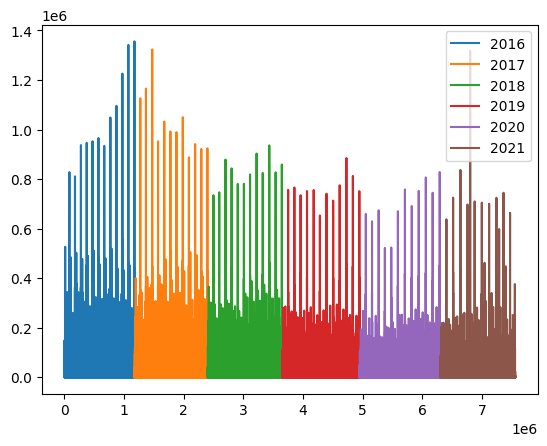

In [ ]:
#df.plot(x='DATA_VENDA', y='TIPO_PRINCIPIO')

df.groupby('ANO_VENDA')['QTD_UNIDADE_FARMACOTECNICA'].plot(x = 'ANO_VENDA', legend=True)